In [1]:
# import requirements library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"C:\Users\Andyana\Downloads\AI\EDA Diamond\data\diamonds.csv")

In [4]:
data.shape

(53940, 10)

pada kodingan diatas data.shape digunakan untuk jumlah baris dan kolom dari dataset_ETS, dan dari hasilnya terdapat 12 kolom dan 550068 baris dalam datasetnya

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


data.info saya gunakan untuk mengetahui informasi yang ada didalam dataset diantaranya adalah apa saja kolom yang ada disana jumlah data yang ada dan type dari dataya

In [6]:
print(data.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


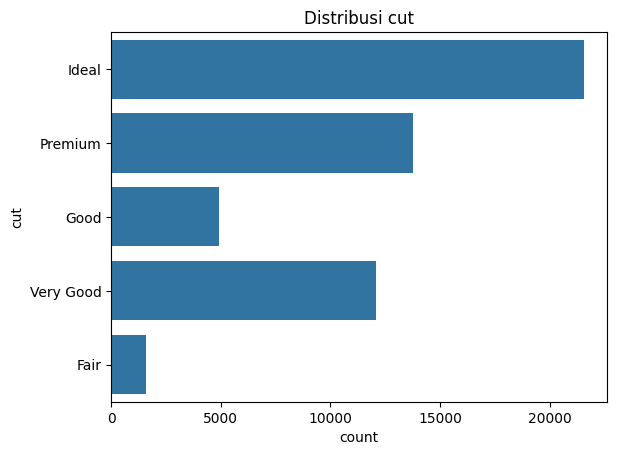

In [7]:
sns.countplot(data['cut'])
plt.title('Distribusi cut')
plt.show()

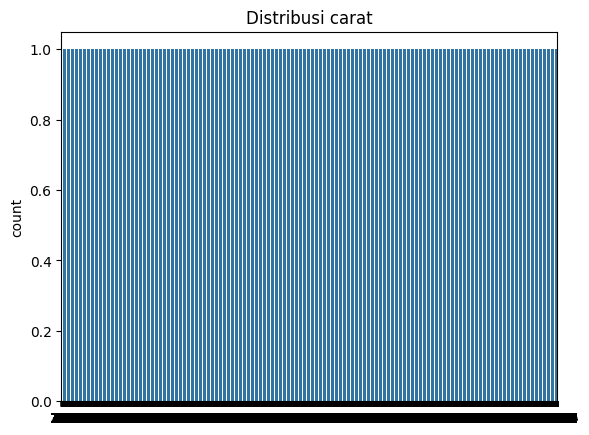

In [8]:
sns.countplot(data['carat'])
plt.title('Distribusi carat')
plt.show()

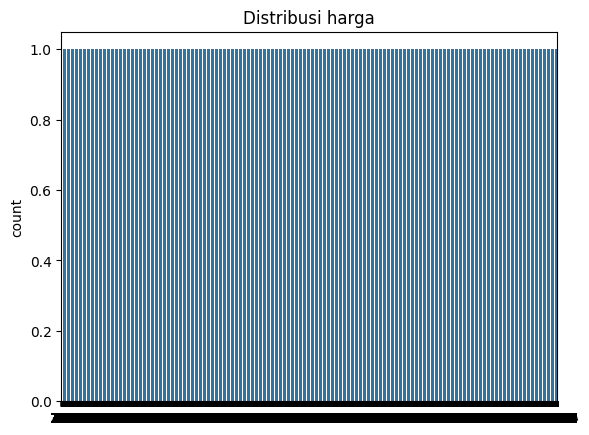

In [28]:
sns.countplot(data['price'])
plt.title('Distribusi harga')
plt.show()

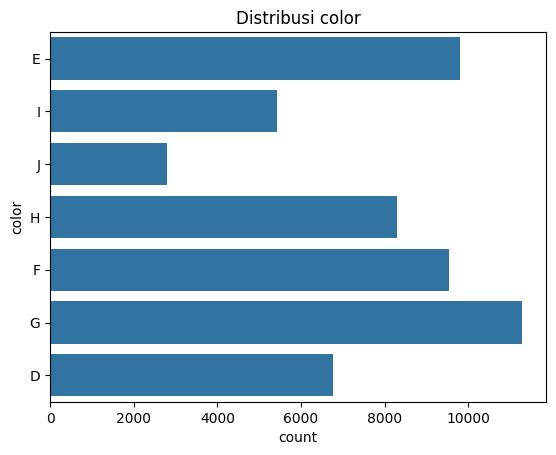

In [10]:
sns.countplot(data['color'])
plt.title('Distribusi color')
plt.show()

disini saya menvisualisasikan distribusi umur dari dataset, dalam hasilnya jumlah paling besar dari dataset itu ada pada umur 26-35 dan yang paling sedikit kontribusinya pada rentang usia 0-17 tahun

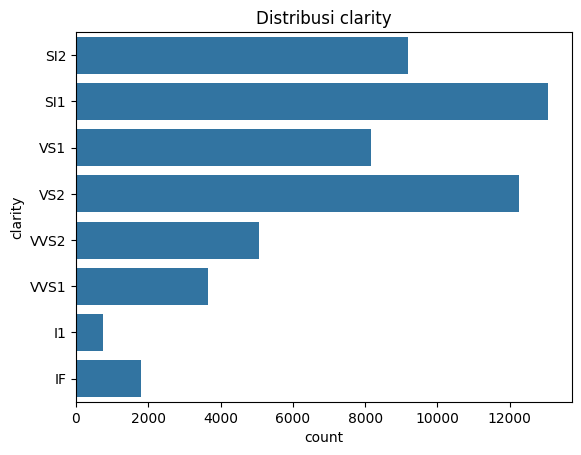

In [11]:
sns.countplot(data['clarity'])
plt.title('Distribusi clarity')
plt.show()

disini terlihat kontribusi gender paling besar dalam pembelian suatu barang adalah oleh (M)

disini saya melakukan checking terhadap data yang hilang dari dataset

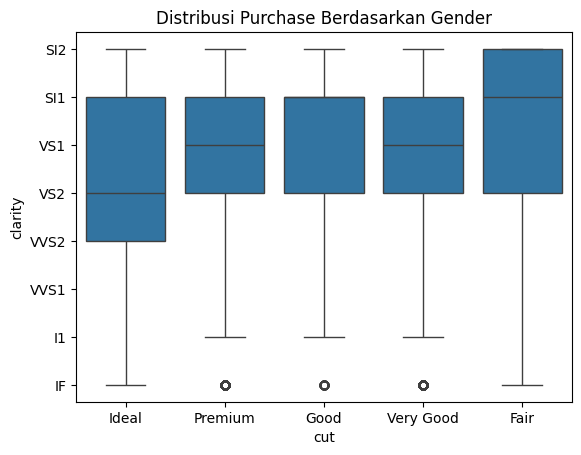

In [12]:
sns.boxplot(x='cut', y='clarity', data=data)
plt.title('Distribusi cut Berdasarkan clarity')
plt.show()

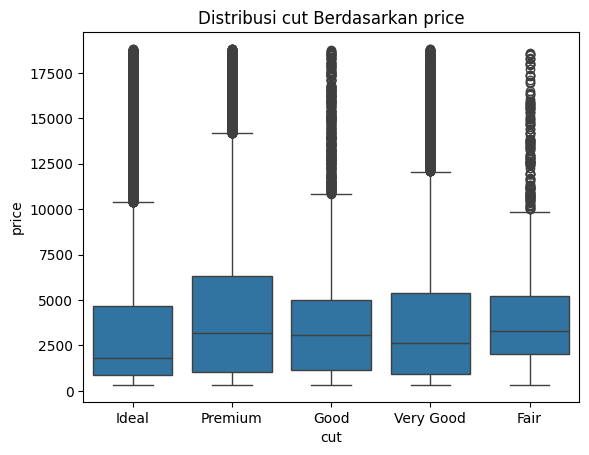

In [15]:
sns.boxplot(x='cut', y='price', data=data)
plt.title('Distribusi cut Berdasarkan price')
plt.show()

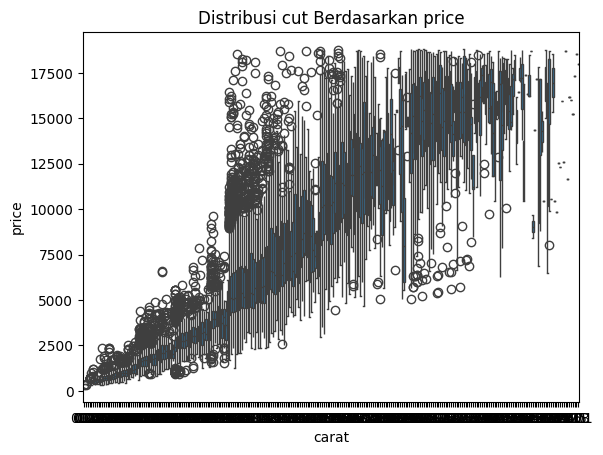

In [16]:
sns.boxplot(x='carat', y='price', data=data)
plt.title('Distribusi cut Berdasarkan price')
plt.show()

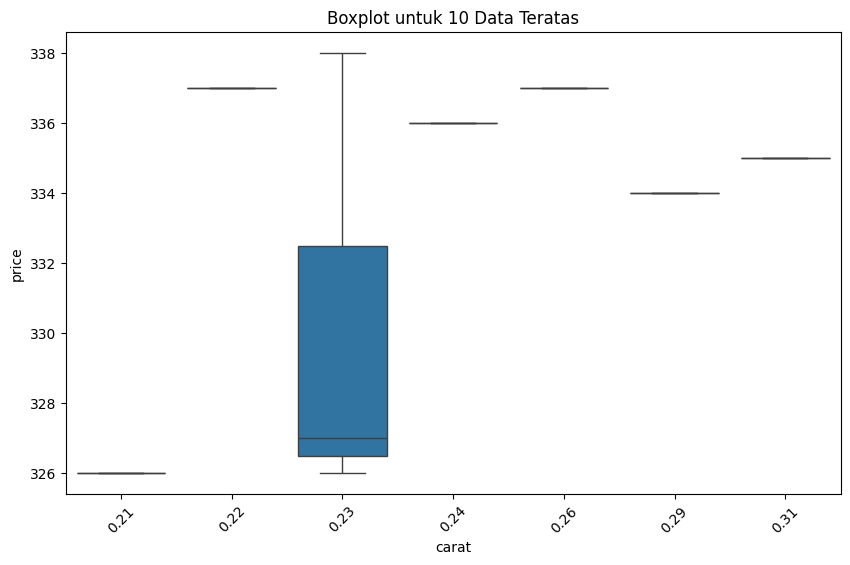

In [13]:
# Ambil 10 data teratas dari dataset
top_10_data = data.head(10)

# Buat boxplot dari subset data tersebut
plt.figure(figsize=(10, 6))
sns.boxplot(x='carat', y='price', data=top_10_data)
plt.title('Boxplot untuk 10 Data Teratas')
plt.xticks(rotation=45)  # Untuk memutar label-labelnya jika perlu
plt.show()

disini saya menggunakan boxplot dari distribusi dari purchase dengan umur, jadi hampir dikatakan seimbang dalam purchase antara gender

dalam hasil yang ada disini seperti sebelumnya namun disini kita membandingankannya dengan usia, dan rata-rata rentang usia juga seimbang datanya 

In [17]:
correlation = data.corr()
print(correlation['price'].sort_values(ascending=False))

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


C:\Users\Andyana\AppData\Local\Temp\ipykernel_15784\3584849813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


disini untuk mengecek korelasi 

In [20]:
top_diamond = data['carat'].value_counts().head(5)
print(top_diamond)

top_price = data.groupby('price')['carat'].sum().sort_values(ascending=False).head(5)
print(top_price)


0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
Name: carat, dtype: int64
price
828    40.53
666    40.05
625    39.86
605    39.79
802    39.51
Name: carat, dtype: float64


disini untuk mengurutkan 5 teratas produk yang paling banyak terjual dan paling banyak di purchase

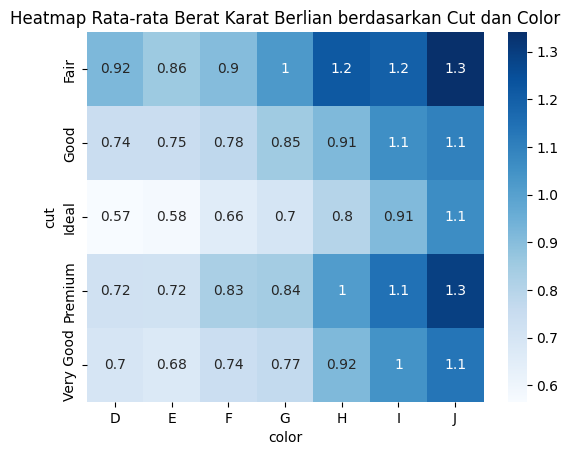

In [25]:
pivot_table = data.pivot_table(index='cut', columns='color', values='carat', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title('Heatmap Rata-rata Berat Karat Berlian berdasarkan Cut dan Color')
plt.show()

dalam bagian ini untuk menggambarkan dan menganalisis rata-rata pembelian berdasarkan umur (Age) dan kategori kota (City_Category) menggunakan heatmap. hasil datanya digunakan untuk membantu memahami pola pembelian berdasarkan dua faktor ini dan mengidentifikasi hubungan antara mereka.

Setelah melakukan EDA (Exploratory Data Analysis) terhadap dataset yang diberikan, beberapa wawasan yang dapat diperoleh dari analisis data  kelompok usia 26-35 tahun merupakan kelompok yang paling aktif  berbelanja. sedangkan kontribusi dari kelompok usia 0-17 tahun cenderung lebih rendah. Oleh karena itu, bisnis mungkin ingin lebih fokus dalam menarik pelanggan berusia 26-35 tahun. analisis menunjukkan bahwa laki-laki (Gender:“M”) cenderung lebih aktif  berbelanja dibandingkan wanita. EDA menemukan bahwa kota-kota 'B' memberikan kontribusi terbesar terhadap pembelian. histogram yang menunjukkan beberapa puncak dalam rentang nilai tertentu. Hal ini mungkin menunjukkan bahwa produk tertentu  lebih mahal atau lebih populer di kalangan pelanggan. Analisis lebih lanjut dapat membantu  mengidentifikasi produk ini dan mengambil tindakan yang tepat. hasil korelasi menunjukkan  tidak adanya korelasi yang kuat antara variabel-variabel pada kumpulan data dan kolom “Pembelian”. Hal ini menunjukkan bahwa faktor-faktor lain  juga dapat mempengaruhi volume pembelian dan analisis lebih lanjut diperlukan untuk memahami faktor-faktor ini. identifikasi produk yang paling banyak dibeli atau terlaris adalah informasi yang berharga. Hal ini dapat membantu bisnis mengoptimalkan hosting dan strategi pemasaran mereka. Terakhir, dengan peta panas rata-rata pembelian berdasarkan usia dan tipe kota, kita dapat melihat bagaimana variabel-variabel ini  berinteraksi untuk memengaruhi pembelian. Analisis ini dapat membantu  merancang strategi yang lebih bertarget untuk kelompok pelanggan tertentu.